## Coherence

In [2]:
import os
import re
import numpy as np
from scipy import io
from collections import defaultdict

folder_path = "D:/LOC_matrix/"

dataset = []

temp_data_epilepsy = defaultdict(lambda: [None]*5)
temp_data_tme = defaultdict(lambda: [None]*5)
temp_data_drug = defaultdict(lambda: [None]*5)
temp_data_control = defaultdict(lambda: [None]*5)

frequency_bands = ["delta", "theta", "alpha", "beta", "gamma"]
frequency_bands_dict = {band: i for i, band in enumerate(frequency_bands)} 

epilepsy_path = os.path.join(folder_path, "epilepsy_rev")
epilepsy_label = 0
for file in os.listdir(epilepsy_path):
    if not file.endswith(".mat"):
        continue

    match = re.search(r"(\w+)_([a-z\d]+)\.mat", file)
    if match is None:
        continue

    frequency_band, patient_number = match.group(1, 2)
    
    file_path = os.path.join(epilepsy_path, file)
    mat_data = io.loadmat(file_path)

    data = np.array(mat_data['data'])

    temp_data_epilepsy[patient_number][frequency_bands_dict[frequency_band]] = data

tme_path = os.path.join(folder_path, "tme_rev")
tme_label = 1
for file in os.listdir(tme_path):
    if not file.endswith(".mat"):
        continue

    # 파일 이름에서 frequency band와 환자 번호 추출
    match = re.search(r"(\w+)_([a-z\d]+)\.mat", file)
    if match is None:
        continue

    frequency_band, patient_number = match.group(1, 2)

    file_path = os.path.join(tme_path, file)
    mat_data = io.loadmat(file_path)

    data = np.array(mat_data['data'])

    temp_data_tme[patient_number][frequency_bands_dict[frequency_band]] = data
    
drug_path = os.path.join(folder_path, "drug_rev")
drug_label = 2
for file in os.listdir(drug_path):
    if not file.endswith(".mat"):
        continue

    match = re.search(r"(\w+)_([a-z\d]+)\.mat", file)
    if match is None:
        continue

    frequency_band, patient_number = match.group(1, 2)

    file_path = os.path.join(drug_path, file)
    mat_data = io.loadmat(file_path)

    data = np.array(mat_data['data'])

    temp_data_drug[patient_number][frequency_bands_dict[frequency_band]] = data
      
control_path = os.path.join(folder_path, "control_rev")
control_label = 3
for file in os.listdir(control_path):
    if not file.endswith(".mat"):
        continue

    match = re.search(r"(\w+)_([a-z\d]+)\.mat", file)
    if match is None:
        continue

    frequency_band, patient_number = match.group(1, 2)

    file_path = os.path.join(control_path, file)
    mat_data = io.loadmat(file_path)

    data = np.array(mat_data['data'])

    temp_data_control[patient_number][frequency_bands_dict[frequency_band]] = data

for patient_number, data in temp_data_epilepsy.items():
    for band in frequency_bands:
        for i in range(19): 
            data[frequency_bands_dict[band]][:i+1, i:] = 0 
    dataset.append((np.stack(data, axis=0), epilepsy_label, patient_number))

for patient_number, data in temp_data_tme.items():
    for band in frequency_bands:
        for i in range(19):  
            data[frequency_bands_dict[band]][:i+1, i:] = 0  
    dataset.append((np.stack(data, axis=0), tme_label, patient_number))

for patient_number, data in temp_data_drug.items():
    for band in frequency_bands:
        for i in range(19):  
            data[frequency_bands_dict[band]][:i+1, i:] = 0  
    dataset.append((np.stack(data, axis=0), drug_label, patient_number))

for patient_number, data in temp_data_control.items():
    for band in frequency_bands:
        for i in range(19):  
            data[frequency_bands_dict[band]][:i+1, i:] = 0 
    dataset.append((np.stack(data, axis=0), control_label, patient_number))

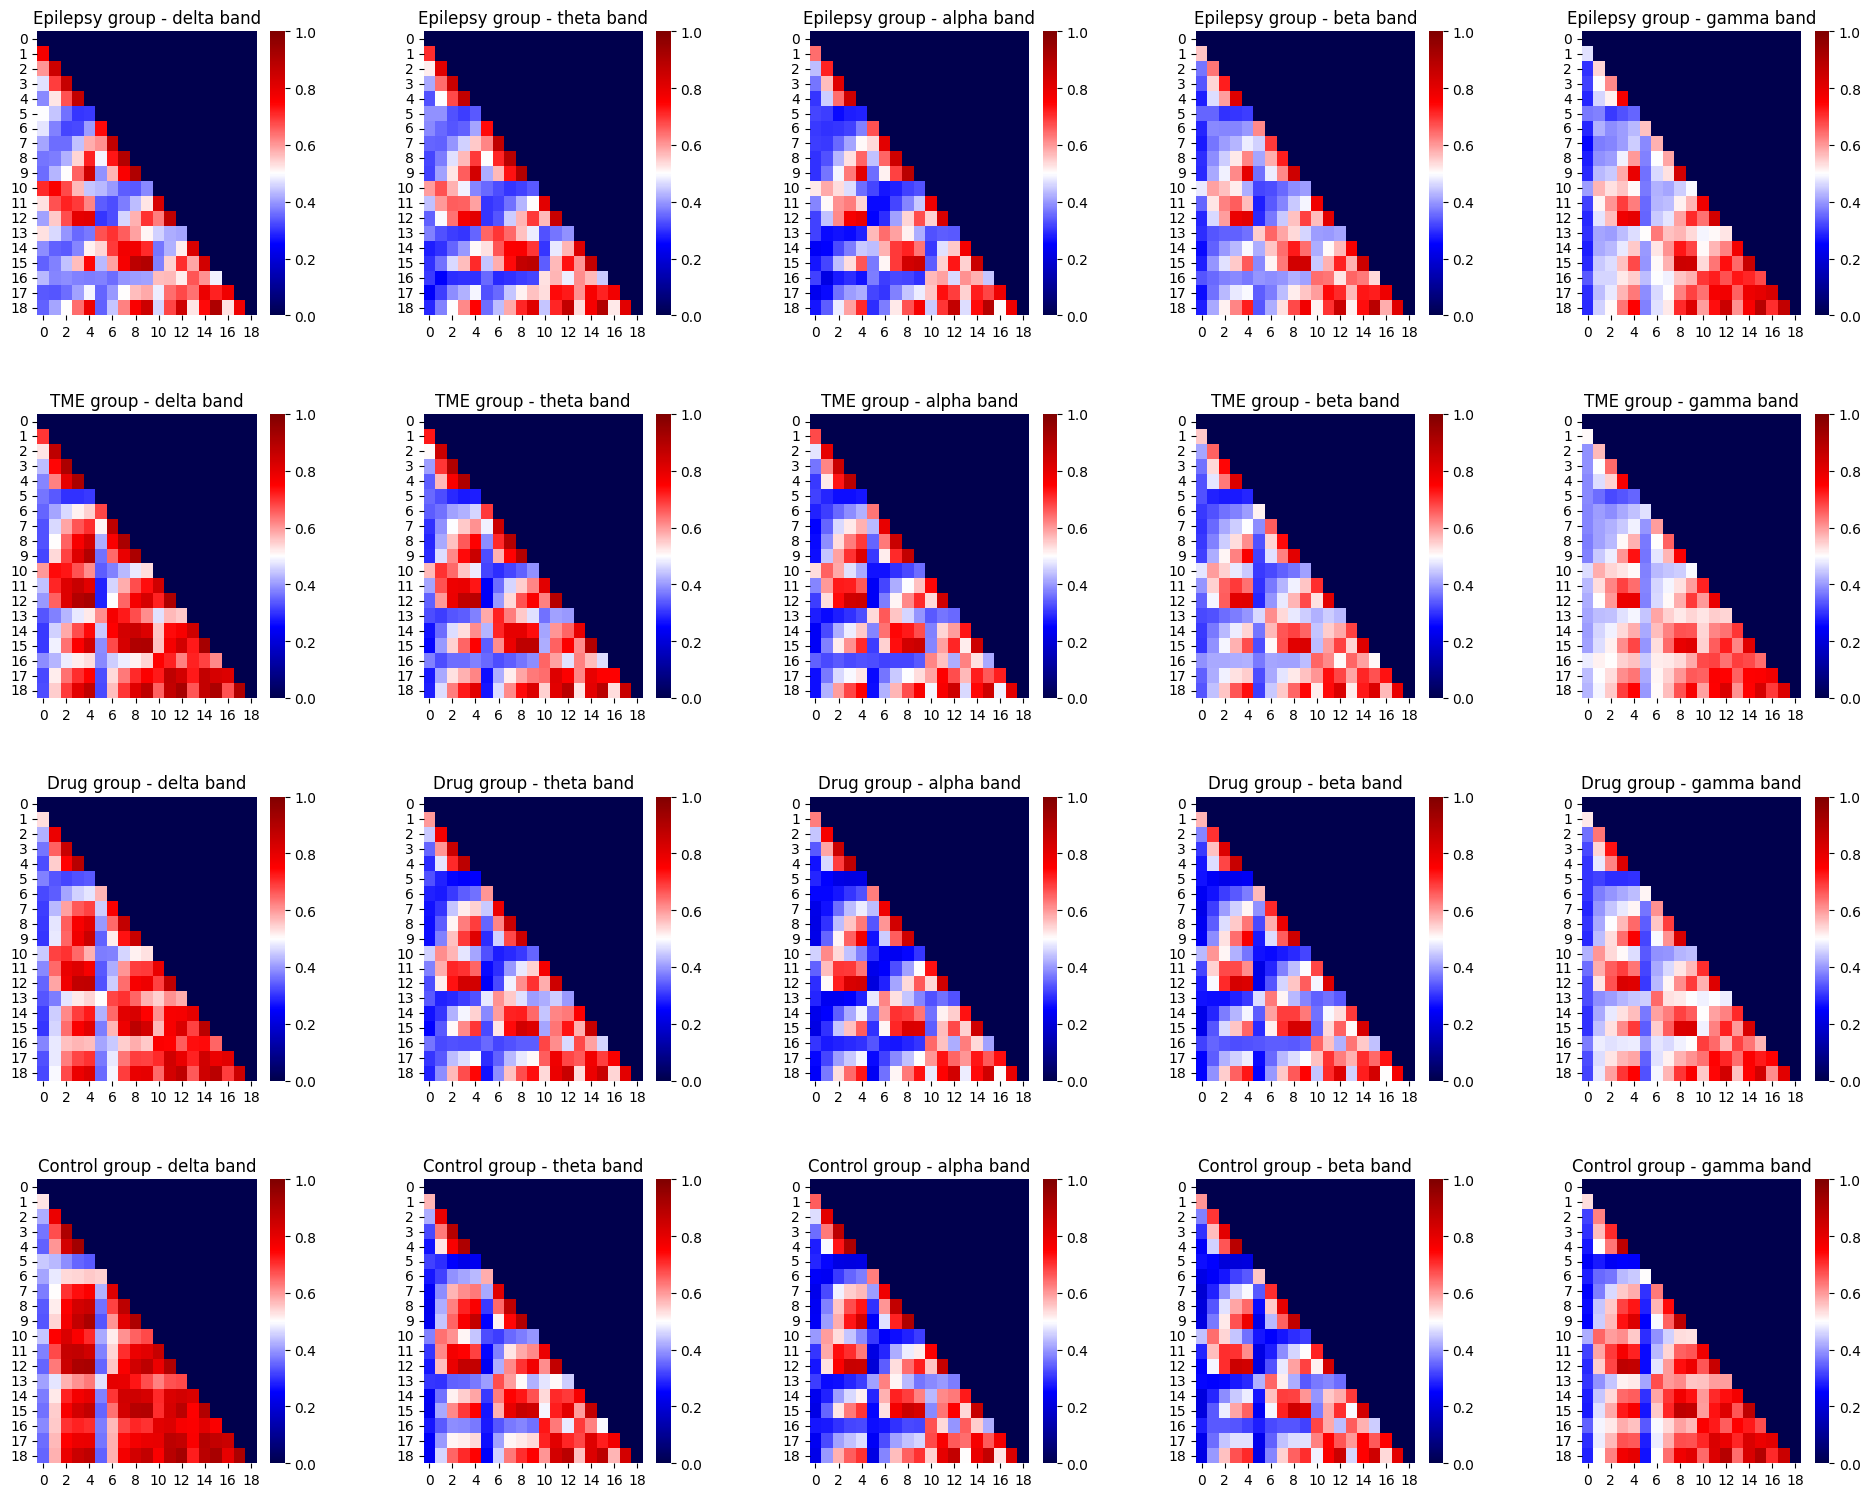

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.tight_layout(pad=5.0)

groups = ["Epilepsy", "TME", "Drug", "Control"]
frequency_bands = ["delta", "theta", "alpha", "beta", "gamma"]
channel_names = ["Fp1", "F7", "T7", "P7", "O1", "Fp2", "F8", "T8", "P8", "O2", "F3", "C3", "P3", "F4", "C4", "P4", "Fz", "Cz", "Pz"]

for i, group in enumerate(groups):
    for j, band in enumerate(frequency_bands):
        # Extract the corresponding data
        group_band_data = [sample[0][j] for sample in dataset if sample[1] == i]
        
        if group_band_data:
            # Calculate the mean
            group_band_data_mean = np.mean(group_band_data, axis=0)
            
            # Plot the mean data
            sns.heatmap(group_band_data_mean, ax=axes[i, j], cmap='seismic', cbar=True, vmin=0, vmax=1)
            axes[i, j].set_title(f'{group} group - {band} band')
            group_band_data_mean = []
            group_band_data = []

        else:
            print(f"No data for {group} group, {band} band")

plt.savefig("FC_heatmap_rev.eps", format='eps')
plt.show()


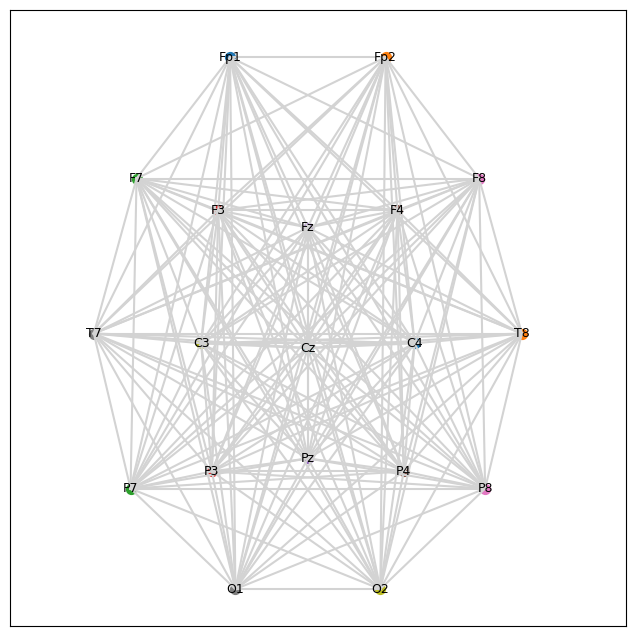

In [5]:
import matplotlib.pyplot as plt
import itertools

channels = {
    "Fp1": (1110.744, 483.033),
    "Fp2": (1153.651, 483.033),
    "F7": (1084.921, 516.507),
    "F3": (1107.466, 525.293),
    "Fz": (1132.197, 530.026),
    "F4": (1156.929, 525.293),
    "F8": (1179.473, 516.507),
    "T7": (1073.133, 559.286),
    "C3": (1102.733, 561.989),
    "Cz": (1132.197, 563.313),
    "C4": (1161.661, 561.989),
    "T8": (1191.261, 559.286),
    "P7": (1083.27, 602.072),
    "P3": (1105.702, 597.34),
    "Pz": (1132.197, 593.753),
    "P4": (1158.693, 597.34),
    "P8": (1181.124, 602.072),
    "O1": (1112.198, 629.815),
    "O2": (1152.196, 629.815)
}

fig, ax = plt.subplots(figsize=(10, 8))

for (ch1, coords1), (ch2, coords2) in itertools.combinations(channels.items(), 2):
    ax.plot([coords1[0], coords2[0]], [coords1[1], coords2[1]], color='lightgray')

for ch, coords in channels.items():
    ax.scatter(*coords, s=50, label=ch)

for ch, coords in channels.items():
    ax.text(coords[0], coords[1], ch, fontsize=9, ha='center', va='center')

ax.set_aspect('equal', 'box')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(1050, 1220)
ax.set_ylim(470, 640)
ax.invert_yaxis() 

plt.show()


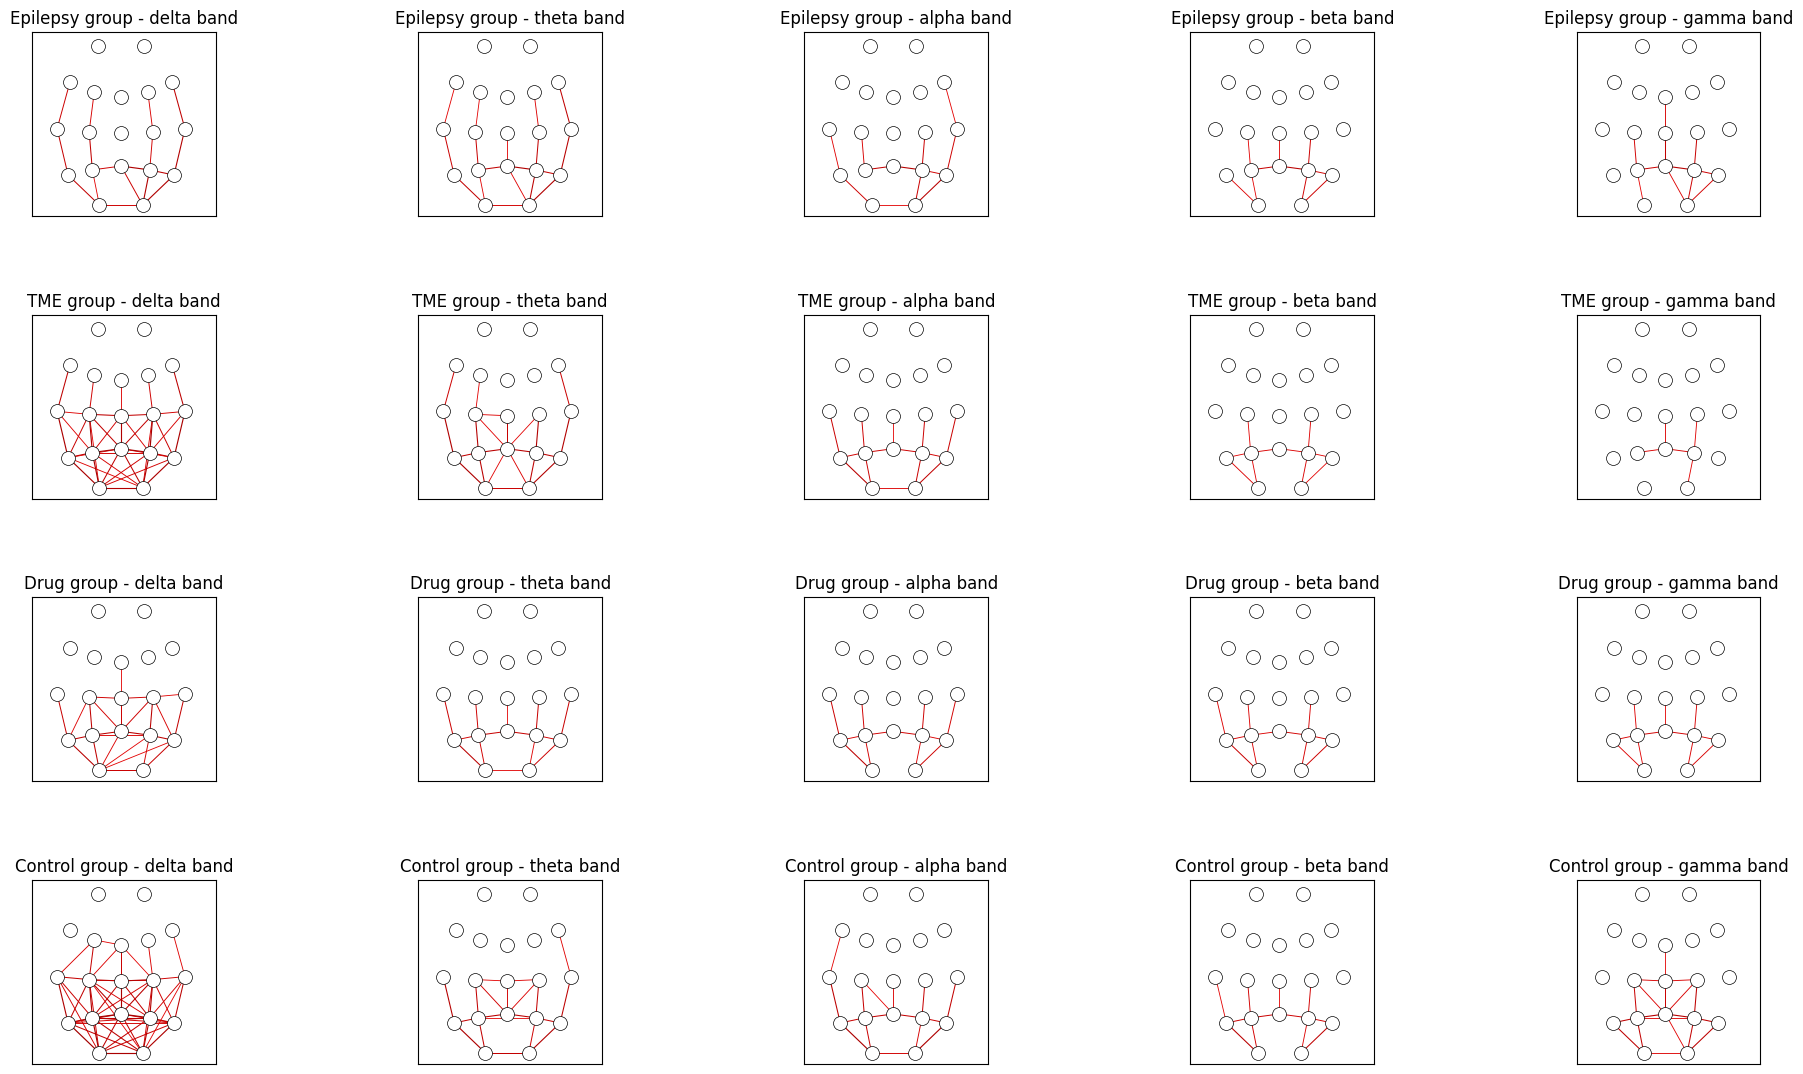

In [11]:
channel_names = ["Fp1", "F7", "T7", "P7", "O1", "Fp2", "F8", "T8", "P8", "O2", "F3", "C3", "P3", "F4", "C4", "P4", "Fz", "Cz", "Pz"]

channel_positions = {name: channels[name] for name in channel_names}

fig, axes = plt.subplots(4, 5, figsize=(20, 12))
fig.tight_layout(pad=5.0)

def compute_coherence_linewidth(coherence, min_width=0.5, max_width=1):
    if coherence <= 0.75:
        return min_width
    else:
        normalized_coherence = (coherence - 0.75) / (1 - 0.75)
        return min_width + normalized_coherence * (max_width - min_width)

for i, group in enumerate(groups):
    for j, band in enumerate(frequency_bands):
        ax = axes[i, j]
        
        group_band_data = [sample[0][j] for sample in dataset if sample[1] == i]
        
        if group_band_data:
            group_band_data_mean = np.mean(group_band_data, axis=0)
            
            for x, ch1 in enumerate(channel_names):
                for y, ch2 in enumerate(channel_names):
                    if x > y:  
                        coherence_value = group_band_data_mean[x, y]
                        if coherence_value >= 0.8:  
                            ax.plot([channels[ch1][0], channels[ch2][0]], 
                                    [channels[ch1][1], channels[ch2][1]], 
                                    color=plt.cm.seismic(coherence_value), 
                                    linewidth=compute_coherence_linewidth(coherence_value))
   
            
            for ch, coords in channels.items():
                ax.scatter(*coords, s=100, label=ch, facecolor='white', edgecolor='black', linewidth=0.5, zorder=3)
            
            ax.set_title(f'{group} group - {band} band')
            ax.set_aspect('equal', 'box')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xlim(1050, 1220)
            ax.set_ylim(470, 640)
            ax.invert_yaxis()  

        else:
            print(f"No data for {group} group, {band} band")

plt.savefig("FC_coherence_rev.eps", format='eps')
plt.show()




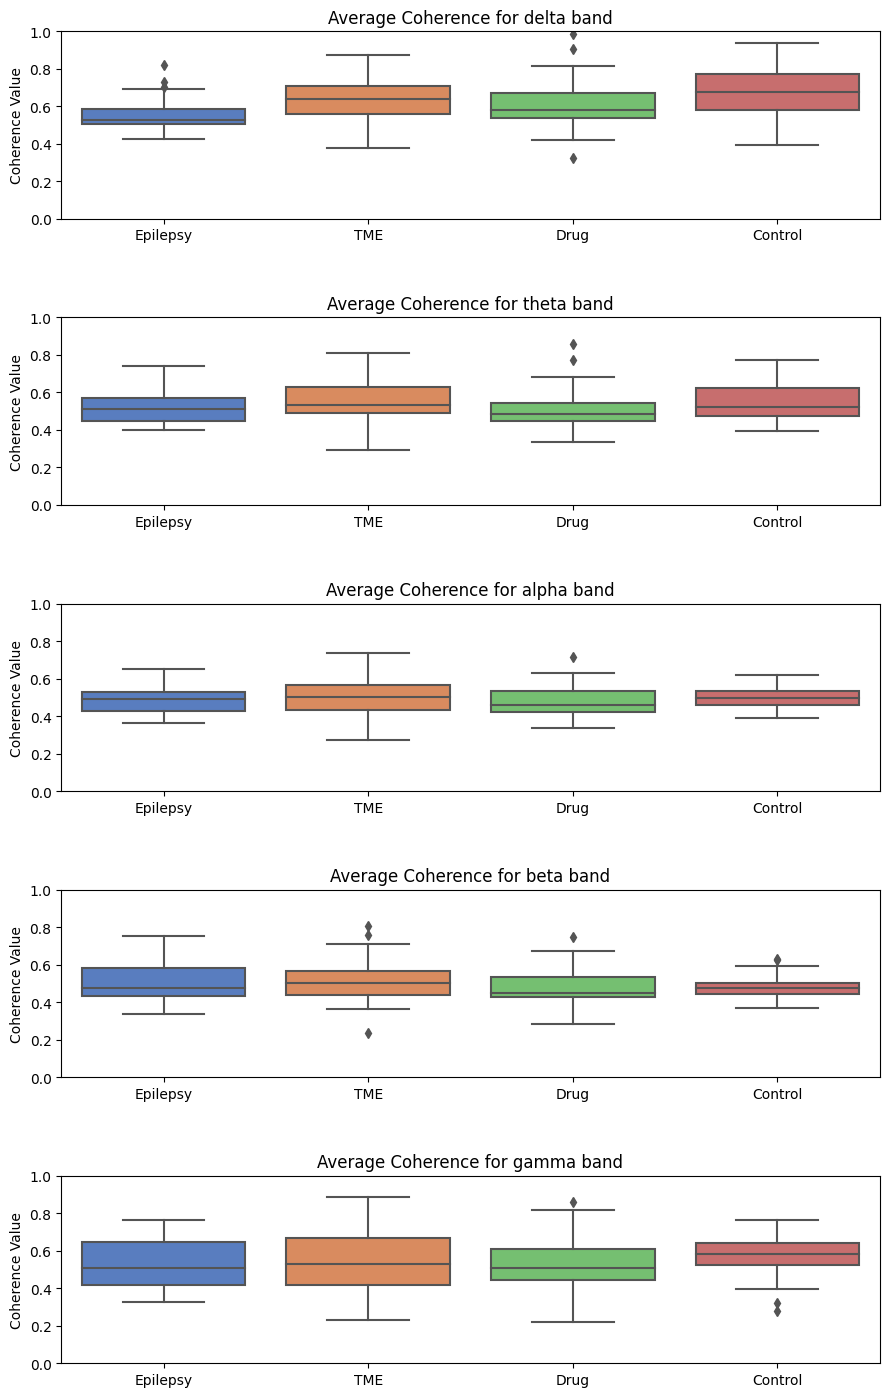

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def extract_lower_triangular_avg(matrix):
    lower_triangular_data = matrix[np.tril_indices(matrix.shape[0], k=-1)]
    return np.mean(lower_triangular_data)

avg_coherence_values = {band: {group: [] for group in groups} for band in frequency_bands}

for sample in dataset:
    data, label, _ = sample
    for j, band in enumerate(frequency_bands):
        band_data = data[j]
        avg_value = extract_lower_triangular_avg(band_data)
        avg_coherence_values[band][groups[label]].append(avg_value)

fig, axes = plt.subplots(len(frequency_bands), 1, figsize=(10, 15))
fig.tight_layout(pad=5.0)

for j, band in enumerate(frequency_bands):
    ax = axes[j]
    data_to_plot = [avg_coherence_values[band][group] for group in groups]
    sns.boxplot(data=data_to_plot, ax=ax, palette='muted')
    ax.set_title(f'Average Coherence for {band} band')
    ax.set_ylabel('Coherence Value')
    ax.set_ylim(0, 1)
    ax.set_xticks(np.arange(len(groups)))
    ax.set_xticklabels(groups)

plt.savefig("FC_avg_coherence_boxplot.eps", format='eps')
plt.show()


## Graph measurements

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


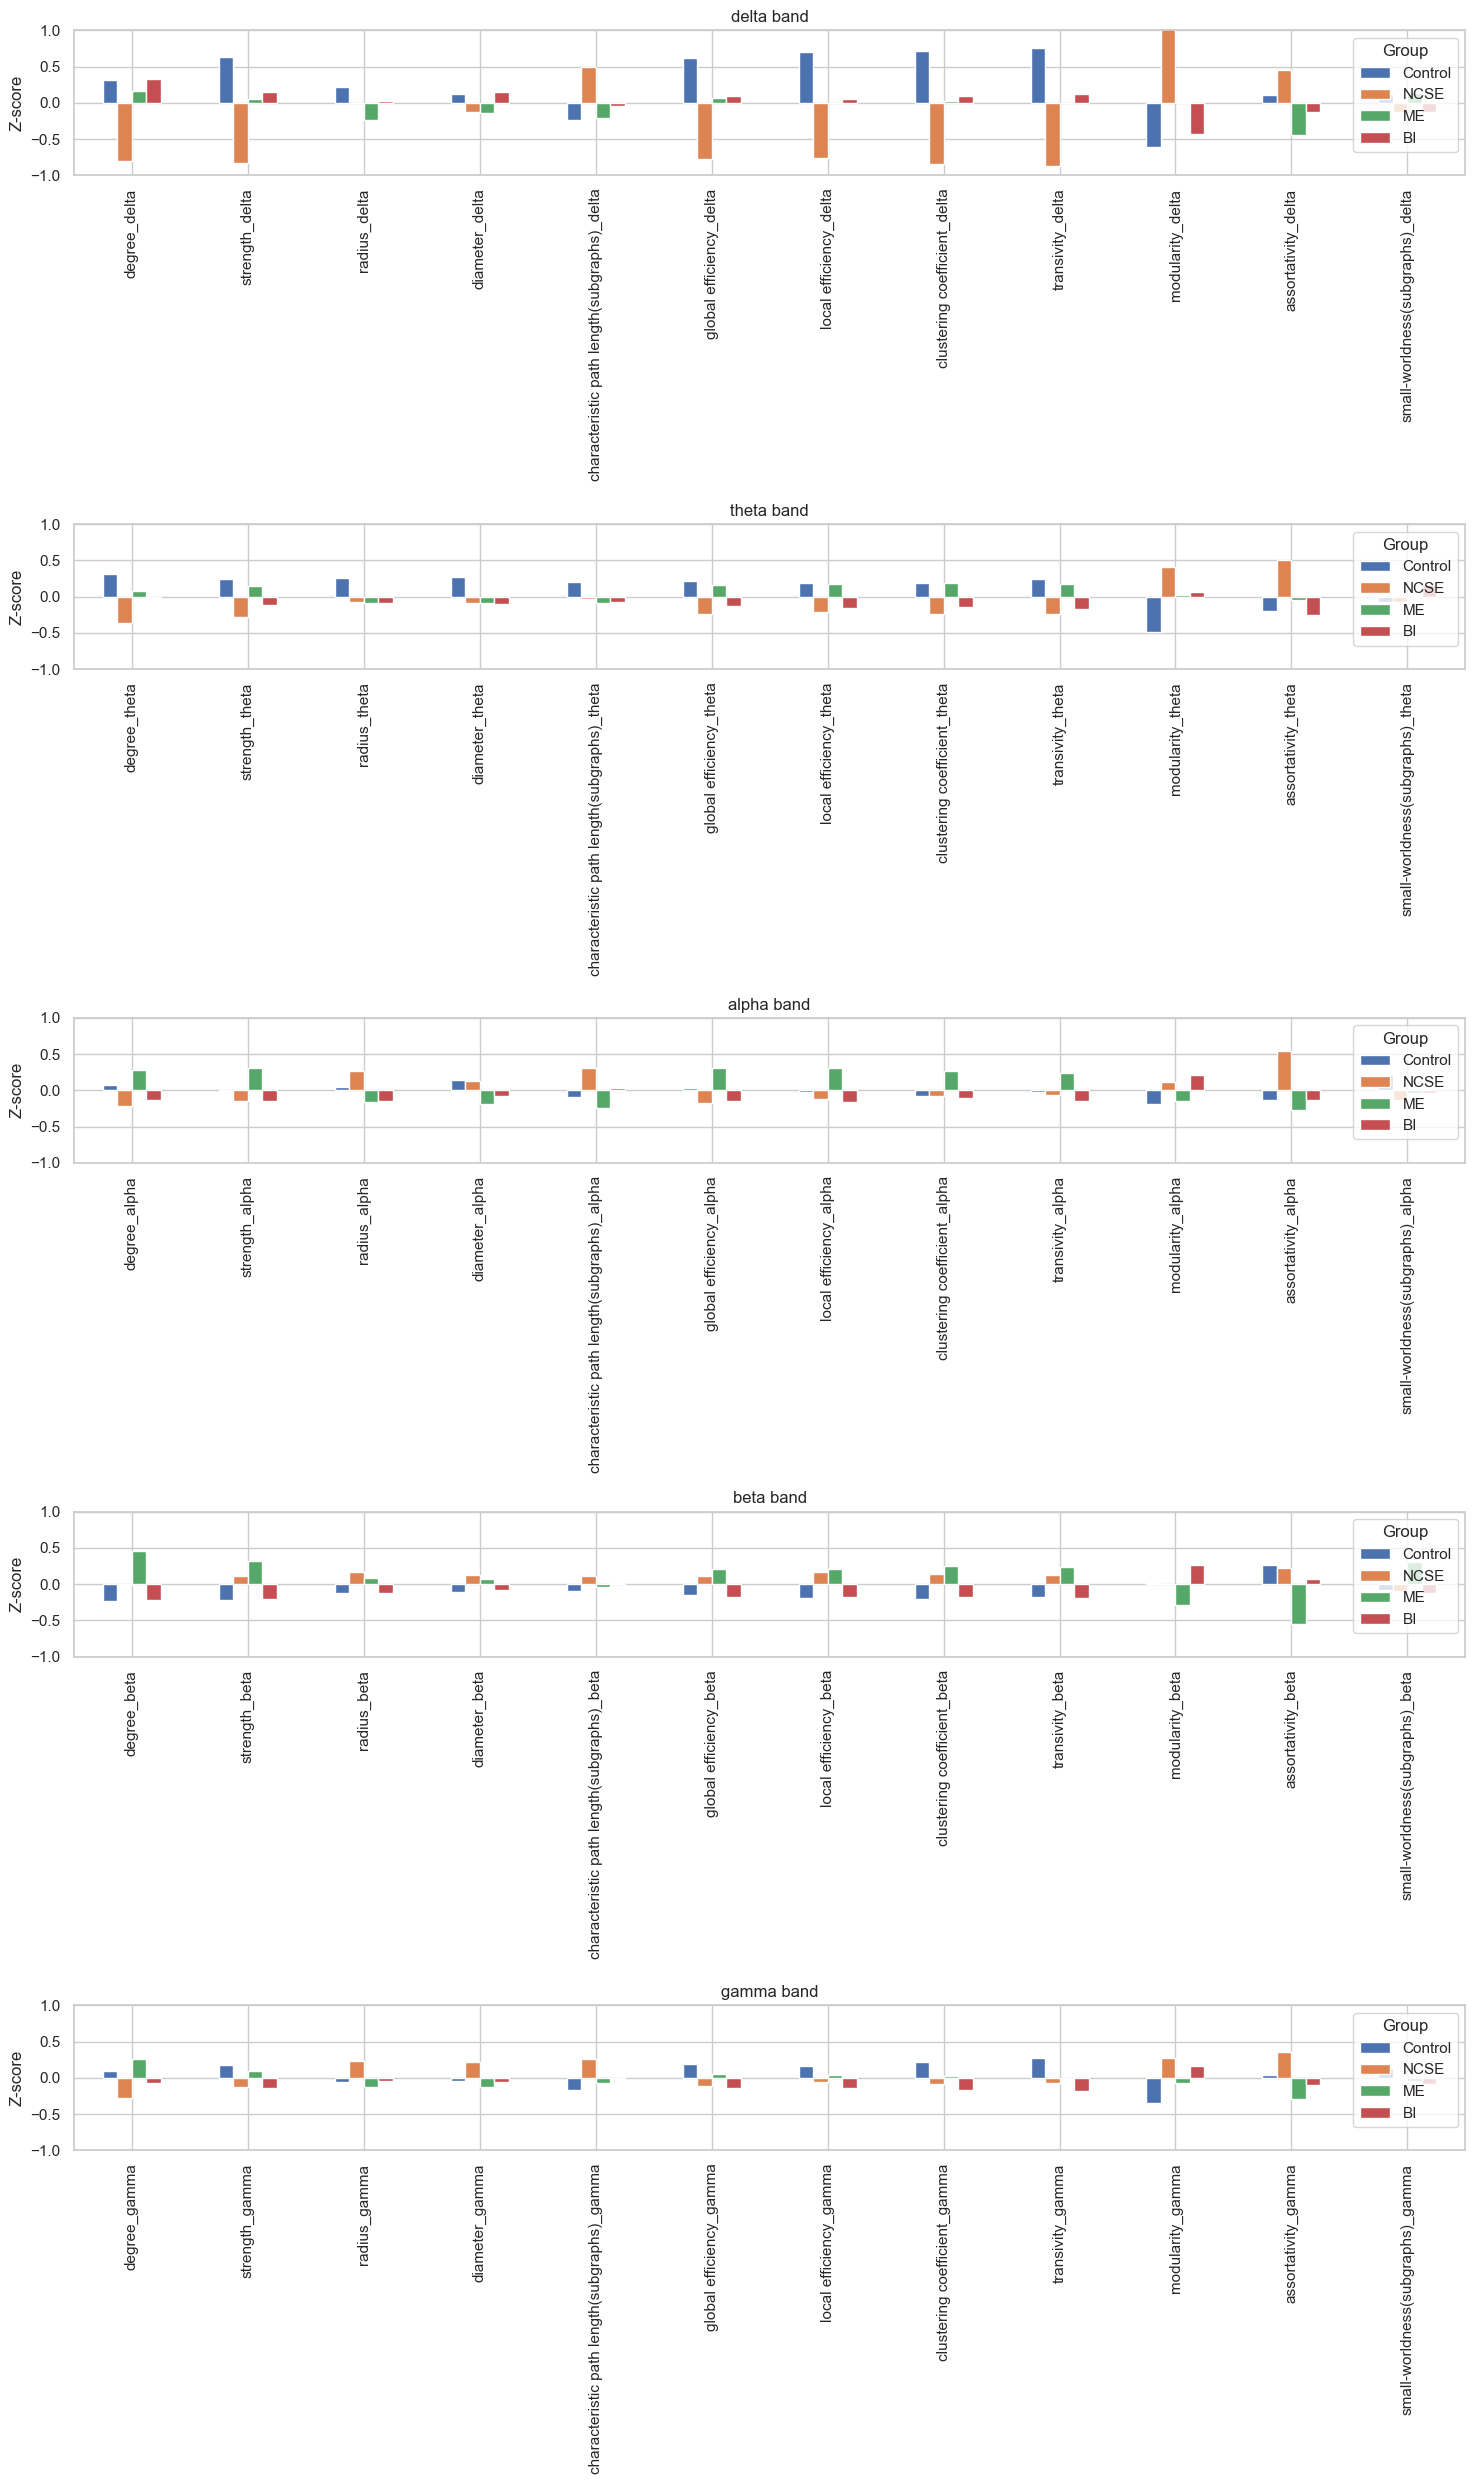

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

df = pd.read_csv('C:/Users/kyt34/data/GRAPH_150.csv')

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

band_order = ["delta", "theta", "alpha", "beta", "gamma"]
group_order = ['Control', 'NCSE', 'ME', 'BI']

for idx, band in enumerate(band_order):
    band_cols = [col for col in df.columns if band in col]
    band_df = df[band_cols]
    
    zscore_df = band_df.apply(zscore)
    
    mean_zscores = zscore_df.groupby(df['group']).mean().reindex(group_order)
    
    mean_zscores.T.plot(kind='bar', ax=axes[idx], ylim=(-1, 1), title=f'{band} band')
    axes[idx].set_ylabel('Z-score')
    axes[idx].legend(title='Group')

plt.tight_layout()
plt.savefig("zscore_analysis.eps", format="eps")
